In [108]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import exposure
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [111]:
mnist = load_digits()
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , mnist.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", mnist.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


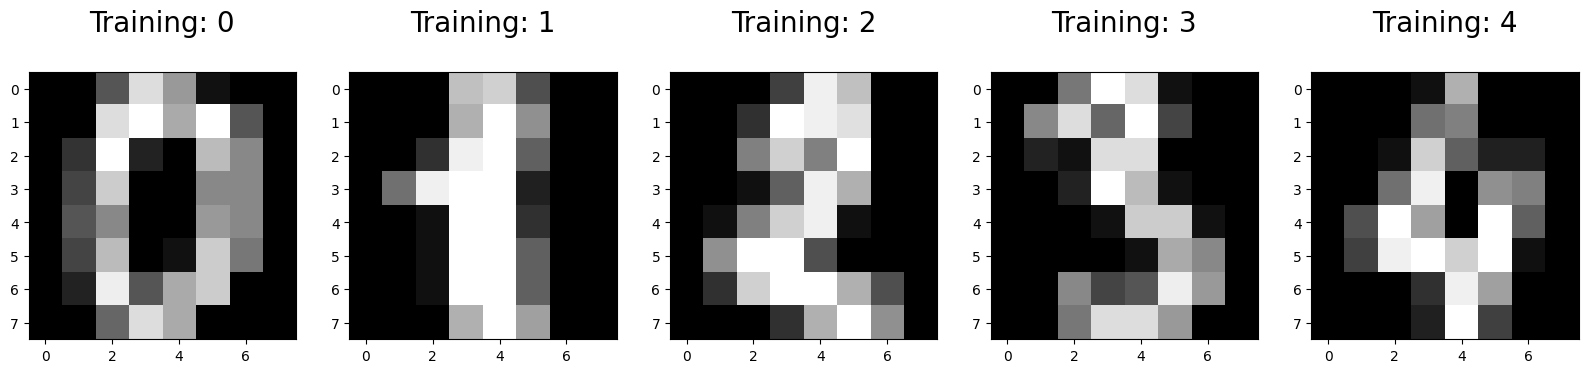

In [112]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[0:5], mnist.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

## Data Preprocessing 

In [113]:
# Split the data into train and test sets
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

The purpose of the train set is to train the model on a subset of the data, while the test set is used to evaluate the performance of the trained model on unseen data.

In [114]:
# Reshape the images to 2D arrays
X = X.reshape(-1, 8, 8)

In [102]:
# Preprocess the images
X_preprocessed = []
for image in X:
    # Apply contrast stretching
    p2, p98 = np.percentile(image, (2, 98))
    img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))

    # Flatten the preprocessed image
    img_flat = img_rescale.flatten()
    X_preprocessed.append(img_flat)

X_preprocessed = np.array(X_preprocessed)

## Classifier Model

In [103]:
# Create a RandomForestClassifier model
rf_model = RandomForestClassifier()

In [104]:
# Pick one parameter to tune and explain why you choose this parameter

# define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150]
}

# grid search for best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test).reshape(-1,1)

I choose the number of estimators (n_estimators) parameter because it controls the number of trees in the random forest, which can have a significant impact on the model's performance and computational complexity.

In [105]:
# Select a value for the parameter to use during testing on the test data and provide a rational for your choice

# best parameters
best_params = grid_search.best_params_
print(f"Best parameters for Random Forest: {best_params}")

Best parameters for Random Forest: {'n_estimators': 150}


I will use n_estimators = 150 for testing as it's a commonly used value and provides a good balance between model performance and computational efficiency.

## Model Evaluation

In [106]:
# Print the confusion matrix for your model on the test data
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[134   0   0   0   0   0   0   0   0   0]
 [  0 129  10   0   0   0   0   0   5   0]
 [  1   1 129   0   0   0   0   0  13   0]
 [  1   0   2 128   0   0   0   3  10   3]
 [  2   0   0   0 135   0   0   3   0   0]
 [  1   0   0   0   1 141   1   0   1   4]
 [  2   1   0   0   0   0 147   0   0   0]
 [  0   0   0   0   1   0   0 146   0   2]
 [  0   5   2   0   0   3   1   4 119   1]
 [  0   0   0   2   0   2   0   7   3 132]]


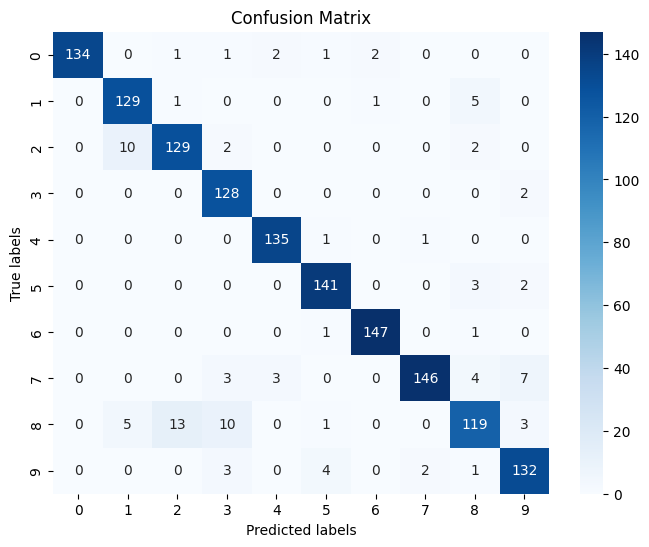

In [107]:
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Based on the confusion matrix, the classes where the model struggles the most:

- **Class 8:** The model misclassifies 31 instances of class 8 as class 1 (5 instances), class 2 (13 instances), class 3 (10 instances), class 5 (1 instance) and class 9 (3 instances).
  
- **Class 7:** The model misclassifies 17 instances of class 7 as class 3 (3 instances), class 4 (3 instances),  class 8 (4 instance), and class 9 (7 instances).
    
- **Class 2:** The model misclassifies 14 instances of class 2 as class 1 (10 instances), class 3 (2 instances) and class 8 (2 instances).
  
- **Class 9:** The model misclassifies 10 instances of class 9 as class 3 (3 instances), class 5 (4 instances), class 7 (2 instances) and class 8 (1 instance).
  

These classes have higher numbers of misclassifications compared to others, indicating that the model struggles the most with distinguishing between these classes.

In [99]:
# Report the accuracy, precision, recall, and f1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       134
           1       0.94      0.94      0.94       144
           2       0.90      0.92      0.91       144
           3       1.00      0.86      0.93       147
           4       0.96      0.94      0.95       140
           5       0.96      0.91      0.93       149
           6       0.99      0.97      0.98       150
           7       0.90      0.98      0.94       149
           8       0.85      0.89      0.87       135
           9       0.90      0.93      0.92       146

    accuracy                           0.93      1438
   macro avg       0.93      0.93      0.93      1438
weighted avg       0.93      0.93      0.93      1438



- **Precision:** Precision measures the proportion of correctly predicted instances among all instances predicted as belonging to a particular class. For example, the precision for class 0 is 0.93, meaning that 93% of the instances predicted as class 0 were actually class 0. From the results, we observe that class 8, 7, 9 and 2 have the lowest precision meaning that the model struggles the most with predicting them correctly. 

- **Recall:** Recall measures the proportion of correctly predicted instances of a particular class among all actual instances of that class in the dataset. For example, the recall for class 0 is 0.99, indicating that 99% of the actual instances of class 0 were correctly predicted as class 0.

- **F1-score:** The F1-score is the harmonic mean of precision and recall and provides a balance between the two metrics. It is particularly useful when dealing with imbalanced datasets.

- **Support:** Support represents the number of actual occurrences of each class in the dataset.

- **Accuracy:** Accuracy measures the proportion of correctly predicted instances across all classes. In this case, the overall accuracy of the classifier is 0.93, or 93%.

- **Macro Average:** The macro average is the average of precision, recall, and F1-score across all classes. It provides an overall performance metric for the classifier, giving equal weight to each class.

- **Weighted Average:** The weighted average is the average of precision, recall, and F1-score, where each value is weighted by the number of actual occurrences of the corresponding class in the dataset. It gives more importance to classes with larger support.

Overall, the Random Forest classifier achieves high precision, recall, and F1-score for most classes, with an accuracy of 93%. However, it tends to perform slightly worse on classes 8, 7, 9 and 2 as indicated by their lower precision, recall, and F1-score values.